# <font color='blue'><ins>TASK</ins></font>
- Carry out a **clustering analysis** considering the following setting.
    - Apply agglomerative clustering on exactly the same dataset (synthetic, originated with *make_blobs*).
    - Discuss the dependancy of the clustering results upon the linkage criterion used
    - For each linkage value
        - plot the *dendrogram* (as usual, check the resources available in sklearn)
        - set n_clusters = 4 and
            - display the clustering result as a scatter plot.
            - evaluate the clustering results in terms of one or more external metrics. 

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=(1),
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

Text(0, 0.5, 'Feature 2')

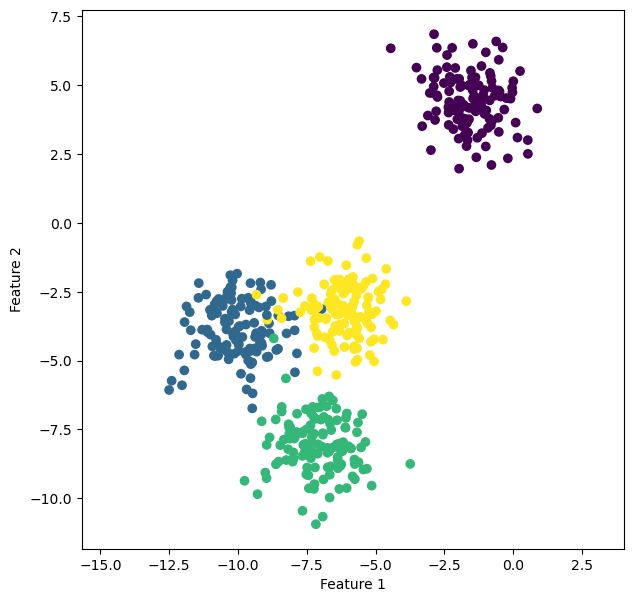

In [3]:
plt.figure(figsize = (7,7))
plt.scatter(X[:,0],X[:,1], c = y)
plt.axis('equal')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [4]:
# Function for plotting dendrogram
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

The four possible linkage criterion (which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion)

- 'ward' minimizes the variance of the clusters being merged.
- 'average' uses the average of the distances of each observation of the two sets.
- 'complete' or 'maximum' linkage uses the maximum distances between all observations of the two sets.
- 'single' uses the minimum of the distances between all observations of the two sets.

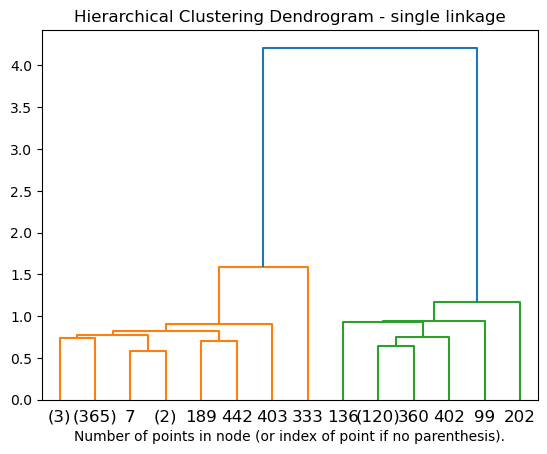

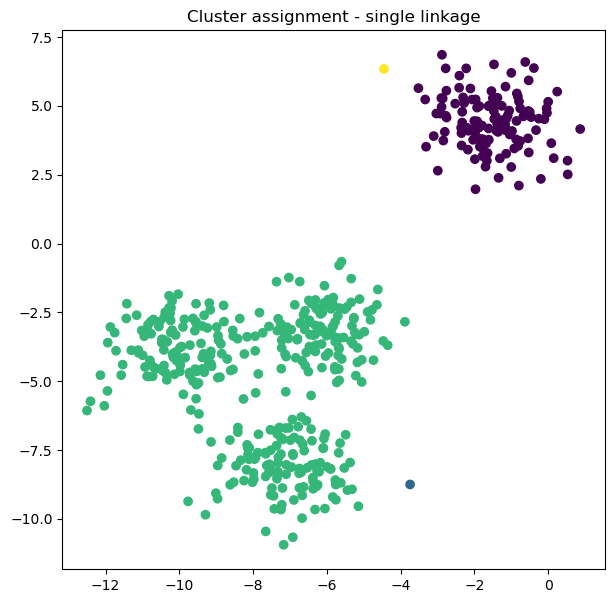

ARI: 0.3296300751488358


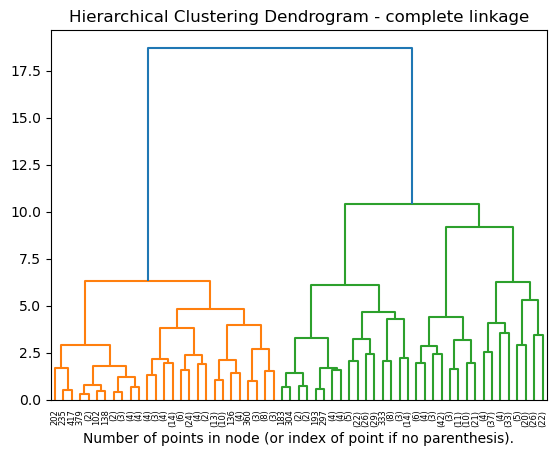

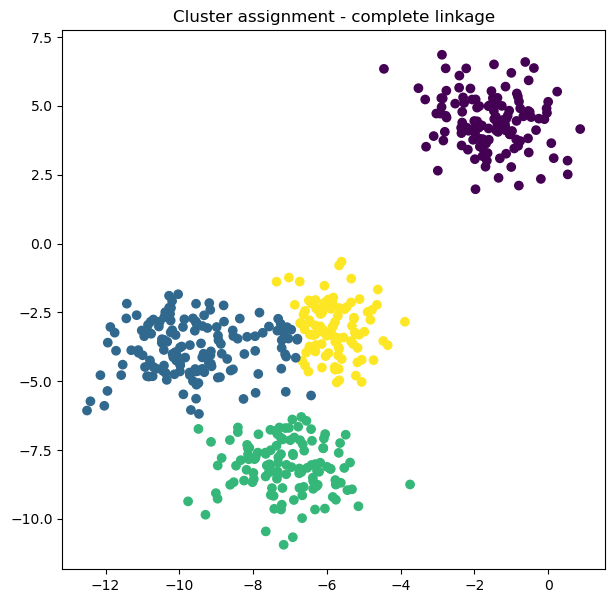

ARI: 0.8637912962751546


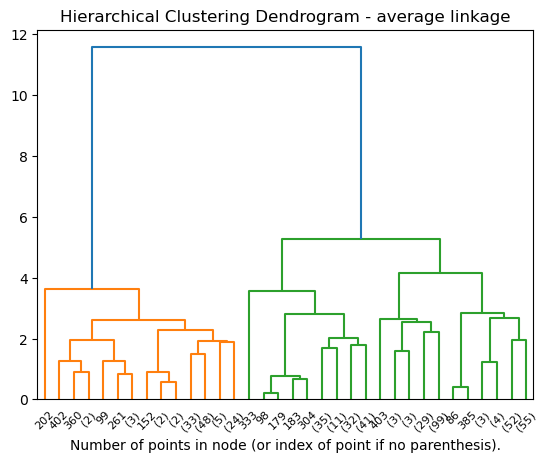

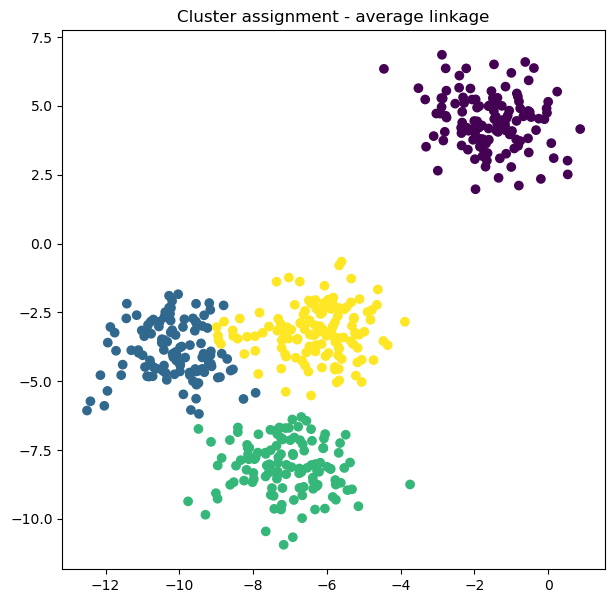

ARI: 0.9235617602509294


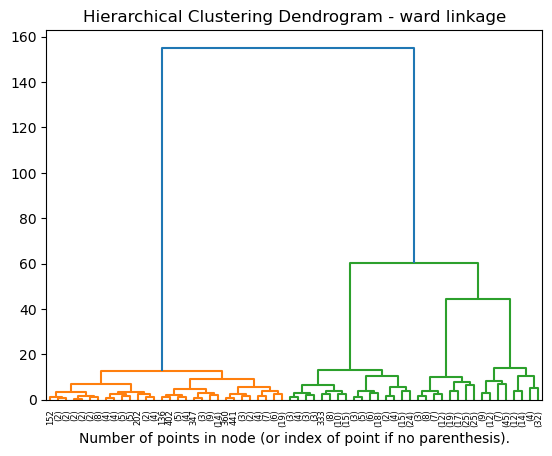

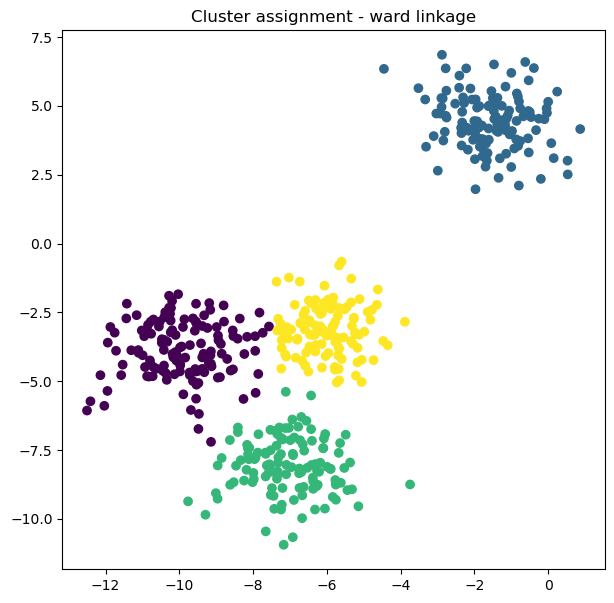

ARI: 0.9270352510894566


In [5]:
# Display results looping over the four options
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
for linkage in ['single','complete','average','ward']:
    
    # setting distance_threshold=0 ensures we compute the full tree.
    model = AgglomerativeClustering(distance_threshold=0, 
                                    n_clusters=None,
                                    linkage = linkage)
    model = model.fit(X)
    plt.title(f"Hierarchical Clustering Dendrogram - {linkage} linkage")
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode="level", p=5)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()
    
    # setting distance_threshold=0 ensures we compute the full tree.
    model = AgglomerativeClustering(n_clusters=4,
                                    linkage = linkage)
    y_pred = model.fit_predict(X)
    plt.figure(figsize = (7,7))
    plt.scatter(X[:,0],X[:,1], c = y_pred)
    plt.title(f'Cluster assignment - {linkage} linkage')
    plt.show()
    print(f'ARI: {adjusted_rand_score(y,y_pred)}')

- average and ward linkage leads to quite satisfactory modelling of our dataset.
- complete linkage is slightly less accurate and partially fails to model the border of the (overlapping) clusters.
- single linkage is extremely sensitive to few outliers (the three close clusters are merged before than some remote objects from gaussian distributions)